In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os
from PIL import Image
from sklearn.utils import shuffle
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Data Exploration

In [ ]:
# download dataset
# reference: https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/
# NOTE: Need to upload kaggle.json file manually if it does not exist in Files (Google Colab)

!pip install -q kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download ashishjangra27/face-mask-12k-images-dataset
!unzip face-mask-12k-images-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Face Mask Dataset/Train/WithoutMask/1855.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1856.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1857.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1858.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1859.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1860.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1861.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1862.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1863.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1864.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1865.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1866.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1867.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1868.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1869.png  
  inflating: Face Mask Dataset/Train/WithoutMask/

In [ ]:
#!kaggle datasets list

In [ ]:
# check how many images and their sizes

# obtain paths
test_mask_path = './Face Mask Dataset/Test/WithMask'
test_nomask_path = './Face Mask Dataset/Test/WithoutMask'
train_mask_path = './Face Mask Dataset/Train/WithMask'
train_nomask_path = './Face Mask Dataset/Train/WithoutMask'
val_mask_path ='./Face Mask Dataset/Validation/WithMask'
val_nomask_path = './Face Mask Dataset/Validation/WithoutMask'

# os.listdir gets all files in a given path
image_count = 0
image_sizes = set()
for i in os.listdir(test_mask_path):
  image_count += 1
  im = Image.open(os.path.abspath(test_mask_path + "/" + i))
  width, height = im.size
  image_sizes.add((width, height))
for i in os.listdir(test_nomask_path):
  image_count += 1
  im = Image.open(os.path.abspath(test_nomask_path + "/" + i))
  width, height = im.size
  image_sizes.add((width, height))
for i in os.listdir(train_mask_path):
  image_count += 1
  im = Image.open(os.path.abspath(train_mask_path + "/" + i))
  width, height = im.size
  image_sizes.add((width, height))
for i in os.listdir(train_nomask_path):
  image_count += 1
  im = Image.open(os.path.abspath(train_nomask_path + "/" + i))
  width, height = im.size
  image_sizes.add((width, height))
for i in os.listdir(val_mask_path):
  image_count += 1
  im = Image.open(os.path.abspath(val_mask_path + "/" + i))
  width, height = im.size
  image_sizes.add((width, height))
for i in os.listdir(val_nomask_path):
  image_count += 1
  im = Image.open(os.path.abspath(val_nomask_path + "/" + i))
  width, height = im.size
  image_sizes.add((width, height))

#image_count = len(list(data_dir.glob('*/*.jpg')))
print("Total images:", image_count)
print("Image sizes (Width, Height):", image_sizes)

Total images: 11792
Image sizes (Width, Height): {(53, 53), (45, 45), (58, 58), (133, 133), (123, 123), (66, 66), (50, 50), (129, 129), (127, 127), (90, 90), (38, 38), (89, 89), (39, 39), (179, 179), (35, 35), (101, 101), (27, 27), (155, 155), (93, 93), (74, 74), (28, 28), (36, 36), (119, 119), (137, 137), (330, 330), (42, 42), (284, 284), (82, 82), (98, 98), (30, 30), (46, 46), (158, 158), (338, 338), (31, 31), (97, 97), (81, 81), (47, 47), (224, 224), (32, 32), (107, 107), (115, 115), (141, 141), (71, 71), (121, 121), (135, 135), (120, 120), (125, 125), (131, 131), (67, 67), (124, 124), (132, 132), (95, 95), (126, 126), (130, 130), (113, 113), (79, 79), (143, 143), (128, 128), (112, 112), (25, 25), (29, 29), (37, 37), (118, 118), (138, 138), (105, 105), (87, 87), (151, 151), (104, 104), (136, 136), (33, 33), (109, 109), (83, 83), (117, 117), (147, 147), (139, 139), (75, 75), (148, 148), (116, 116), (108, 108), (70, 70), (140, 140), (56, 56), (69, 69), (59, 59), (307, 307), (60, 60), 

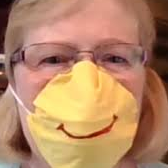

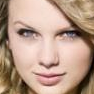

In [ ]:
# view some example images
mask_im = Image.open(os.path.abspath(test_mask_path + "/1174.png"))
nomask_im = Image.open(os.path.abspath(test_nomask_path + "/3006.png"))
display(mask_im)
display(nomask_im)

In [ ]:
# class names
class_names = ['Masked', 'Not masked']
print(class_names)

['Masked', 'Not masked']


In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array
# set up data for training mask data
train_mask_list = []
train_mask_labels = []

for i in os.listdir(train_mask_path):
  im = Image.open(os.path.abspath(train_mask_path + "/" + i))
  width, height = im.size
  if width >= 100 and height >= 100:
    im = im.resize((100, 100))
    # convert to numpy array
    im = img_to_array(im)
    train_mask_list.append(im)
    train_mask_labels.append(1)


# establish dataframe containing masked images and their targets
train_mask_df = pd.DataFrame()
train_mask_df['image'] = train_mask_list
train_mask_df['target'] = train_mask_labels

# set up data for training nonmask data
train_nomask_list = []
train_nomask_labels = []

for i in os.listdir(train_nomask_path):
  im = Image.open(os.path.abspath(train_nomask_path + "/" + i))
  width, height = im.size
  if width >= 100 and height >= 100:
    im = im.resize((100, 100))
    im = img_to_array(im)
    train_nomask_list.append(im)
    train_nomask_labels.append(0)

# establish dataframe containing nonmasked images and their targets
train_nomask_df = pd.DataFrame()
train_nomask_df['image'] = train_nomask_list
train_nomask_df['target'] = train_nomask_labels

# combine separate training dataframes and shuffle
train_df = pd.concat([train_mask_df, train_nomask_df])
train_df = shuffle(train_df)

# set up data for testing mask data
test_mask_list = []
test_mask_labels = []

for i in os.listdir(test_mask_path):
  im = Image.open(os.path.abspath(test_mask_path + "/" + i))
  width, height = im.size
  if width >= 100 and height >= 100:
    im = im.resize((100, 100))
    im = img_to_array(im)
    test_mask_list.append(im)
    test_mask_labels.append(1)

# establish dataframe containing masked images and their targets
test_mask_df = pd.DataFrame()
test_mask_df['image'] = test_mask_list
test_mask_df['target'] = test_mask_labels

# set up data for testing nomask data
test_nomask_list = []
test_nomask_labels = []

for i in os.listdir(test_nomask_path):
  im = Image.open(os.path.abspath(test_nomask_path + "/" + i))
  width, height = im.size
  if width >= 100 and height >= 100:
    im = im.resize((100, 100))
    im = img_to_array(im)
    test_nomask_list.append(im)
    test_nomask_labels.append(0)

# establish dataframe containing nonmasked images and their targets
test_nomask_df = pd.DataFrame()
test_nomask_df['image'] = test_nomask_list
test_nomask_df['target'] = test_nomask_labels

# combine separate testing dataframes and shuffle
test_df = pd.concat([test_mask_df, test_nomask_df])
test_df = shuffle(test_df)

In [ ]:
train_df

,image,target
1713,"[[[134.0, 101.0, 58.0], [133.0, 101.0, 55.0], ...",0
2623,"[[[24.0, 11.0, 3.0], [25.0, 15.0, 8.0], [24.0,...",1
879,"[[[99.0, 67.0, 61.0], [99.0, 67.0, 61.0], [99....",1
2827,"[[[190.0, 145.0, 112.0], [187.0, 145.0, 109.0]...",0
4242,"[[[55.0, 43.0, 45.0], [51.0, 39.0, 40.0], [57....",1
...,...,...
825,"[[[38.0, 38.0, 40.0], [39.0, 39.0, 41.0], [42....",0
2008,"[[[18.0, 17.0, 15.0], [19.0, 18.0, 16.0], [19....",0
2446,"[[[26.0, 10.0, 5.0], [20.0, 2.0, 0.0], [30.0, ...",1
2612,"[[[102.0, 77.0, 56.0], [124.0, 99.0, 77.0], [1...",0


In [ ]:
test_df

,image,target
270,"[[[159.0, 157.0, 140.0], [108.0, 107.0, 89.0],...",0
66,"[[[249.0, 249.0, 249.0], [250.0, 250.0, 250.0]...",1
417,"[[[197.0, 150.0, 118.0], [197.0, 150.0, 118.0]...",1
22,"[[[173.0, 136.0, 91.0], [175.0, 138.0, 93.0], ...",0
6,"[[[31.0, 23.0, 6.0], [32.0, 24.0, 6.0], [37.0,...",1
...,...,...
210,"[[[77.0, 41.0, 15.0], [97.0, 54.0, 28.0], [113...",1
259,"[[[249.0, 220.0, 227.0], [245.0, 218.0, 223.0]...",1
78,"[[[250.0, 249.0, 245.0], [239.0, 232.0, 221.0]...",0
229,"[[[108.0, 120.0, 108.0], [108.0, 120.0, 108.0]...",1


In [ ]:
# creating the model
train_model = Sequential([
  layers.Rescaling(1./255, input_shape=(100, 100, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation='sigmoid'),
])

In [ ]:
# compiling the model
train_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
train_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 100, 100, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 64)        1

In [ ]:
train_image_array = np.stack(np.asarray(train_df["image"]))
test_image_array = np.stack(np.asarray(test_df["image"]))
train_target_array = np.asarray(train_df["target"])
test_target_array = np.asarray(test_df["target"])

In [ ]:
print(train_image_array.shape)

(8020, 100, 100, 3)


In [ ]:
fitted_Model = train_model.fit(train_image_array, train_target_array, validation_split=0.15, batch_size=10, epochs=10)

Epoch 1/10
682/682 [==============================] - 84s 122ms/step - loss: 0.1440 - accuracy: 0.9400 - val_loss: 0.0544 - val_accuracy: 0.9817
Epoch 2/10
682/682 [==============================] - 83s 121ms/step - loss: 0.0383 - accuracy: 0.9867 - val_loss: 0.0242 - val_accuracy: 0.9917
Epoch 3/10
682/682 [==============================] - 85s 124ms/step - loss: 0.0297 - accuracy: 0.9900 - val_loss: 0.0277 - val_accuracy: 0.9875
Epoch 4/10
682/682 [==============================] - 85s 125ms/step - loss: 0.0233 - accuracy: 0.9918 - val_loss: 0.0163 - val_accuracy: 0.9958
Epoch 5/10
682/682 [==============================] - 84s 123ms/step - loss: 0.0149 - accuracy: 0.9947 - val_loss: 0.0126 - val_accuracy: 0.9942
Epoch 6/10
682/682 [==============================] - 83s 121ms/step - loss: 0.0344 - accuracy: 0.9864 - val_loss: 0.0148 - val_accuracy: 0.9942
Epoch 7/10
682/682 [==============================] - 87s 127ms/step - loss: 0.0105 - accuracy: 0.9962 - val_loss: 0.0132 - val_ac

In [ ]:
## evaluate model to compare training vs. test error
from sklearn.metrics import classification_report

yhat_train = train_model.predict(train_image_array)
yhat_train = [1 if y>=0.5 else 0 for y in yhat_train]
yhat_test = train_model.predict(test_image_array)
yhat_test = [1 if y>=0.5 else 0 for y in yhat_test]

print("Training performance:\n %s" % classification_report(train_target_array, yhat_train))

print("Testing performance:\n %s" % classification_report(test_target_array, yhat_test))


25/25 [==============================] - 3s 103ms/step
Training performance:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3611
           1       1.00      1.00      1.00      4409

    accuracy                           1.00      8020
   macro avg       1.00      1.00      1.00      8020
weighted avg       1.00      1.00      1.00      8020

Testing performance:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       372
           1       0.99      0.99      0.99       427

    accuracy                           0.99       799
   macro avg       0.99      0.99      0.99       799
weighted avg       0.99      0.99      0.99       799



25/25 [==============================] - 3s 139ms/step - loss: 0.0448 - accuracy: 0.9862


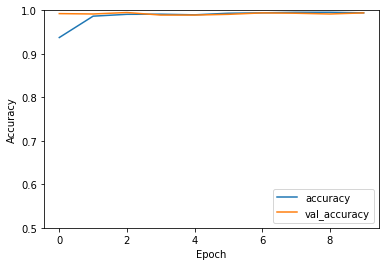

In [ ]:
# Evaluation Graph
import matplotlib.pyplot as plt

plt.plot(fitted_Model.history['accuracy'], label='accuracy')
plt.plot(fitted_Model.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = train_model.evaluate(test_image_array, test_target_array)

In [ ]:
# Fitting Graph

# should show test not val_accuracy
# do model.evaluate() on your test
# tensorflow -> make more models https://www.tensorflow.org/tutorials/keras/classification
# https://www.tensorflow.org/tutorials/images/classification
# test